## Given access to free trial with selected features for use in 24 hours, following model would analyze the free trial usage behavior and predict the scope for premium subscription

## IMPORT DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from dateutil import parser

In [2]:
input_data = pd.read_csv('appdata10.csv')

In [3]:
input_data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
input_data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# convert date from string to numerical format
input_data['hour'] = input_data.hour.str.slice(1,3).astype(int)

In [6]:
input_data.tail()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,1,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [7]:
# remove the following columns for visualizing the dataset
remove_col = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled']
dataset = input_data.copy().drop(columns = remove_col)

## DATA VISUALIZATION

<Figure size 432x288 with 0 Axes>

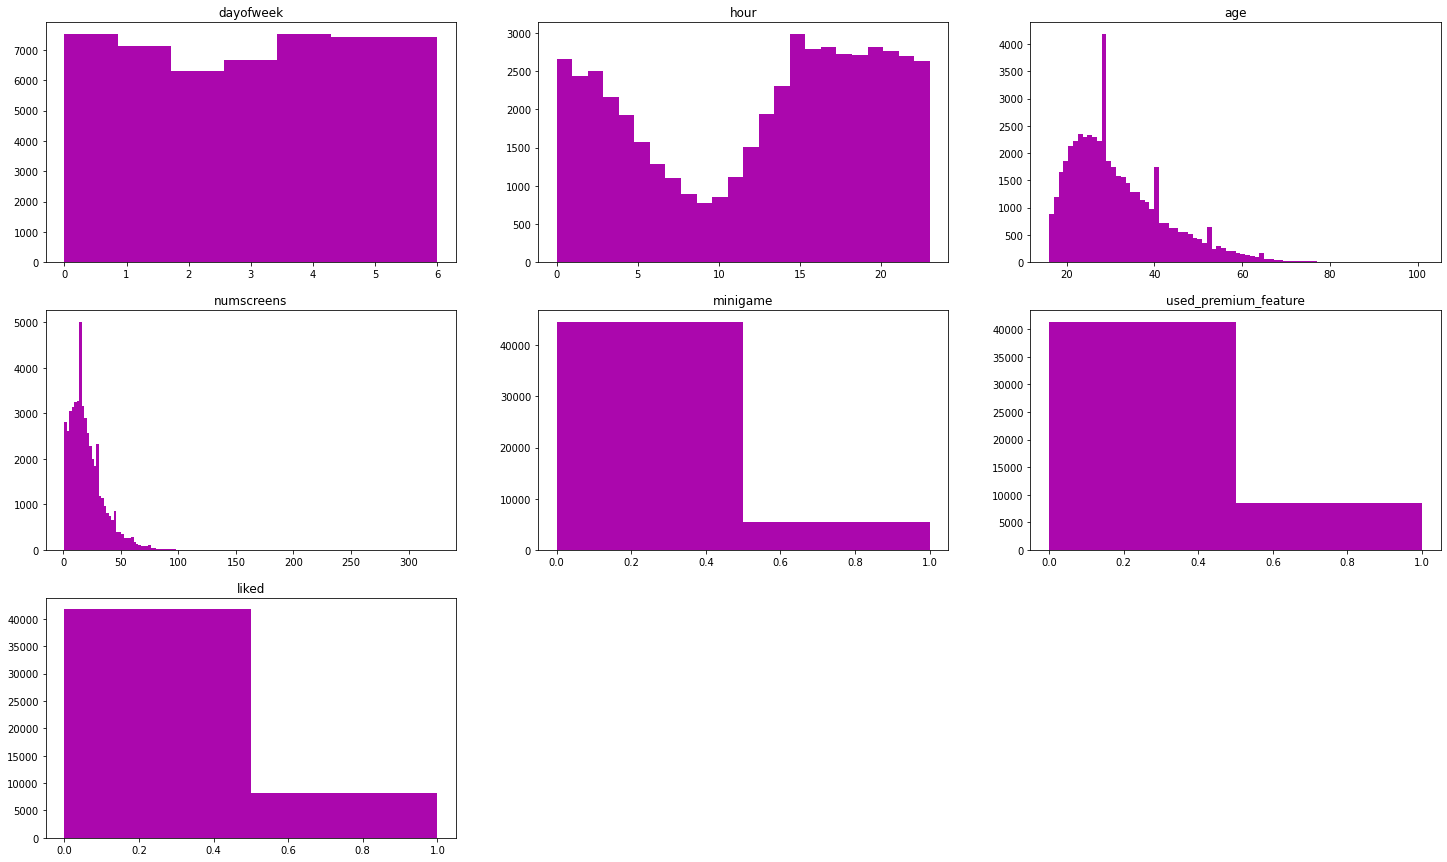

In [8]:
plt.suptitle('Histogram display of Numerical columns', fontsize = 20)
plt.figure(figsize=(25,15))
for i in range(1, dataset.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(dataset.columns.values[i-1])
    vals = np.size(dataset.iloc[:, i-1].unique())
    plt.hist(dataset.iloc[:, i-1], bins=vals, color='#AB07AD')

## PAIRPLOT

## CORRELATION WITH RESPONSE VARIABLE

<AxesSubplot:title={'center':'correlation with response variable'}>

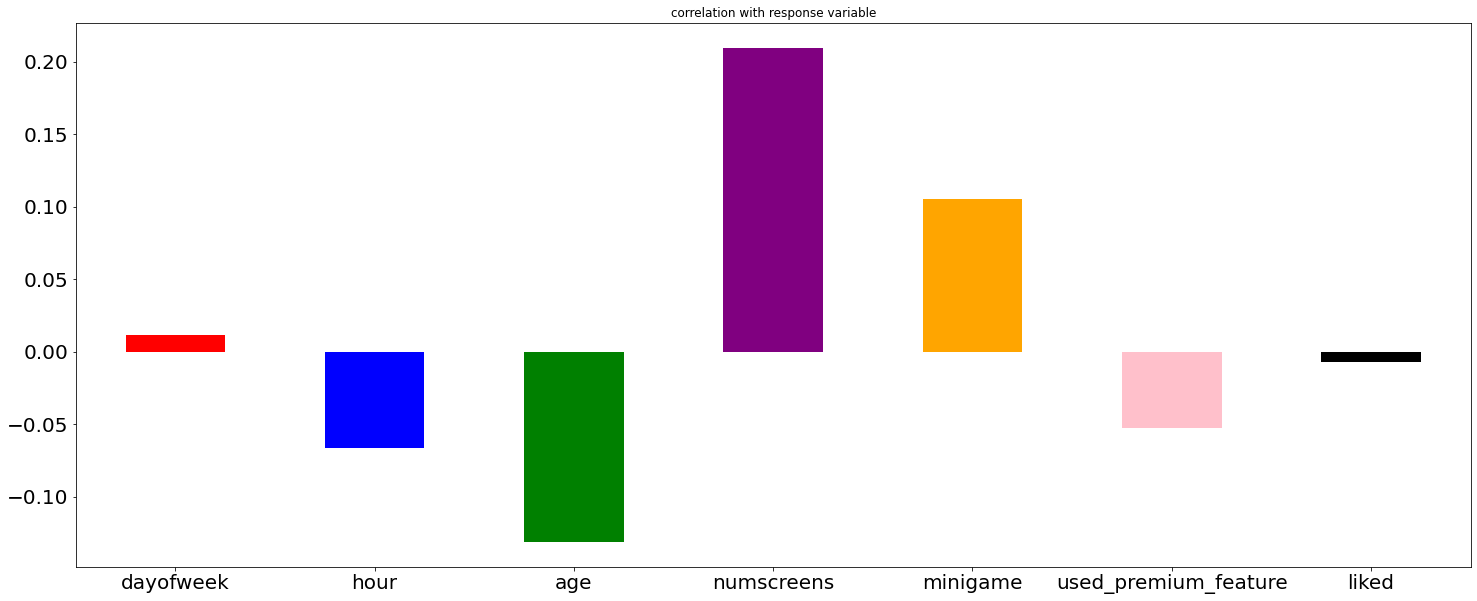

In [9]:
dataset.corrwith(input_data.enrolled).plot.bar(figsize=(25,10),
                                           title = 'correlation with response variable',
                                           fontsize=20, rot=0,
                                           grid=False,
                                           color=['red', 'blue', 'green', 'purple', 'orange', 'pink', 'black']
                                       )

## CORRELATION MATRIX

<AxesSubplot:>

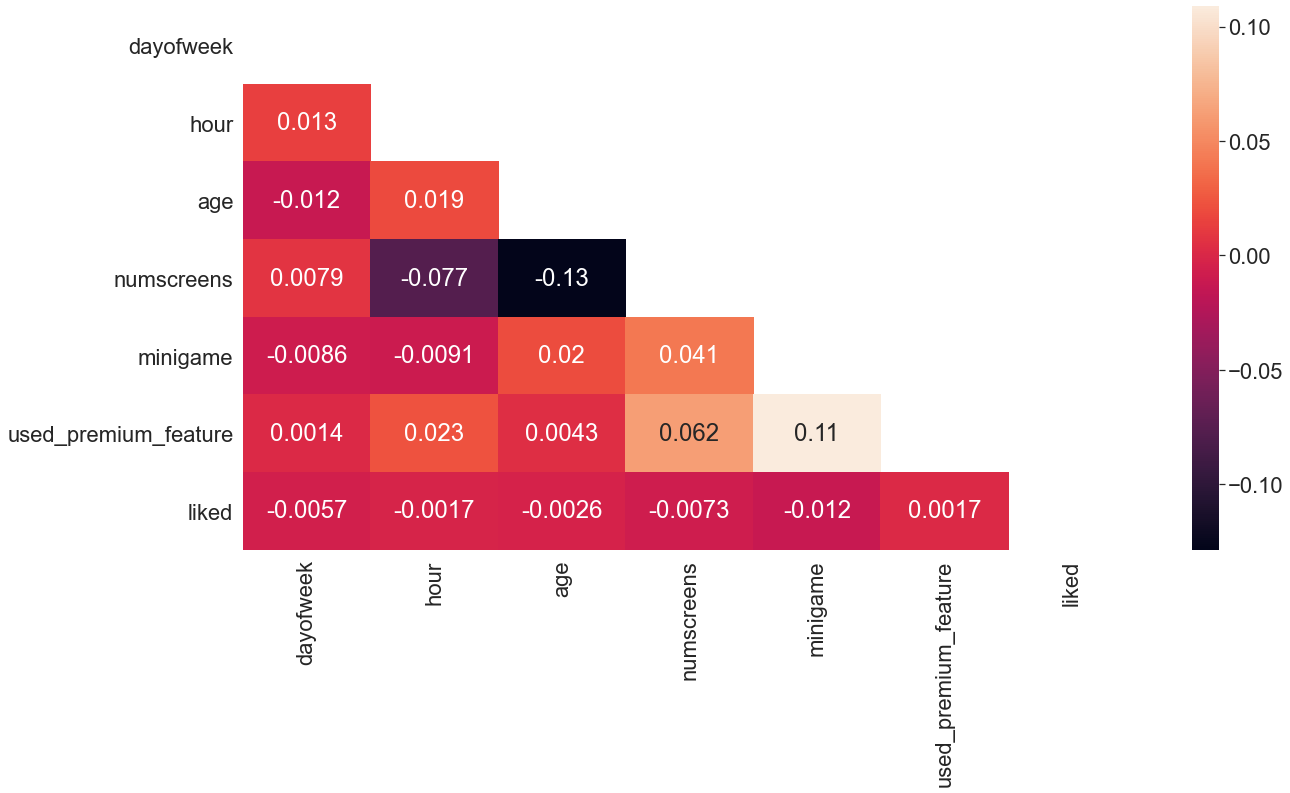

In [10]:
plt.figure(figsize=(20,10))
sn.set(style='white', font_scale=2)
# remove the symmetric portion of the martix from heatmap
mask = np.zeros_like(dataset.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sn.heatmap(dataset.corr(), mask=mask, annot=True)

In [11]:
# sn.pairplot(data=input_data, hue='enrolled', vars=dataset.columns)

In [12]:
input_data['first_open'] = [parser.parse(row_data) for row_data in input_data['first_open']]
input_data['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in input_data['enrolled_date']]
input_data['difference'] = (input_data.enrolled_date - input_data.first_open).astype('timedelta64[h]')

Text(0.5, 1.0, 'distribution of time since enrolled')

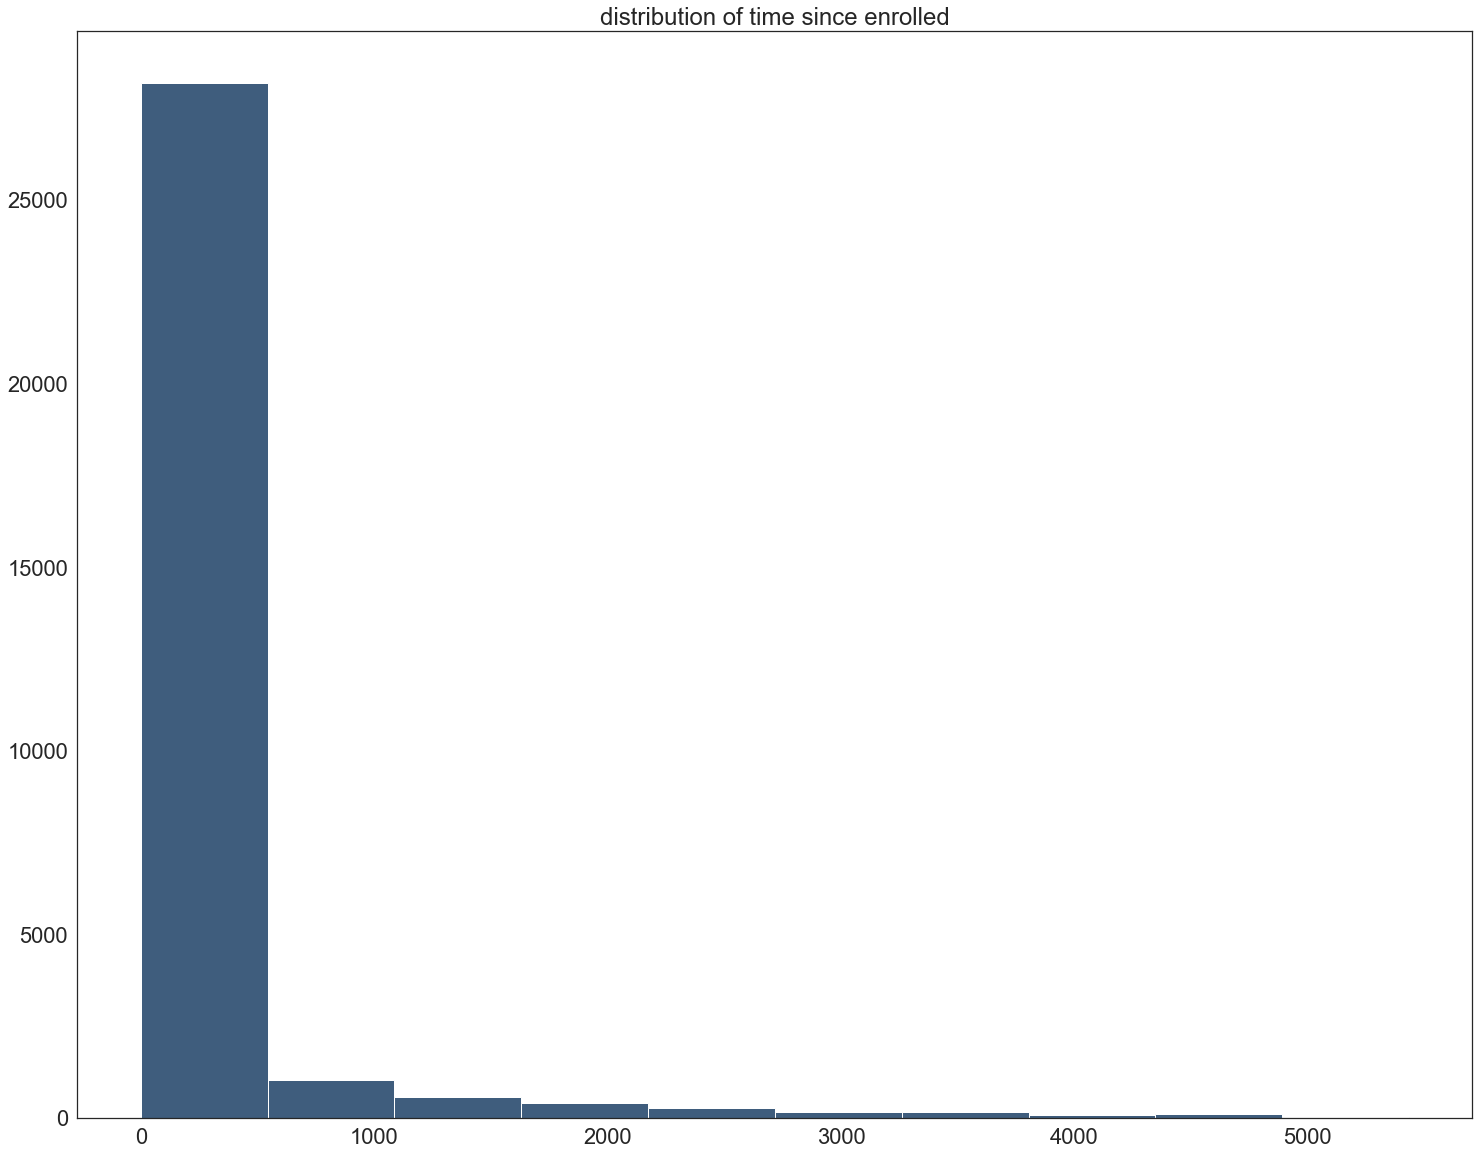

In [13]:
plt.figure(figsize=(25,20))
plt.hist(input_data['difference'].dropna(), color='#3F5D7D')
plt.title('distribution of time since enrolled')


In [14]:
input_data.loc[input_data.difference > 48, 'enrolled'] =0

In [15]:
input_data = input_data.drop(columns = ['difference', 'enrolled_date', 'first_open'])

## FEATURE ENGINEERING - SELECT TOP SCREENS

In [16]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values

In [17]:
input_data['screen_list'] = input_data.screen_list.astype(str) + ','
for sc in top_screens:
    input_data[sc] = input_data.screen_list.str.contains(sc).astype(int)
    input_data['screen_list'] = input_data.screen_list.str.replace(sc+",", "")
input_data['other'] = input_data.screen_list.str.count(',')
input_data = input_data.drop(columns=['screen_list'])

In [18]:
input_data.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

## FUNNELS - GROUP SIMILAR SCREENS AND GET THE COUNT

In [20]:
savings_cols = []
for i in input_data.columns:
    if i.startswith('Saving'):
        savings_cols.append(i)

In [24]:
input_data['SavingsCount'] = input_data[savings_cols].sum(axis=1)
input_data = input_data.drop(columns=savings_cols)

In [23]:
print(savings_cols)

['Saving9', 'Saving1', 'Saving8', 'Saving10', 'Saving4', 'Saving7', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5']


In [26]:
cm_cols = [cm for cm in input_data.columns if cm.startswith('Credit')]

In [28]:
loan_cols = [loan for loan in input_data.columns if loan.startswith('Loan')]

In [29]:
cc_cols = [cc for cc in input_data.columns if cc.startswith('CC')]

In [30]:
drop_cols = cm_cols + loan_cols + cc_cols

In [32]:
input_data = input_data.drop(columns=drop_cols)

In [33]:
input_data.to_csv('new_subdata.csv', index=False)

## DATA PRE-PROCESSING

In [34]:
dataset = pd.read_csv('new_subdata.csv')

In [35]:
response = dataset['enrolled']

In [36]:
dataset.drop(columns=['enrolled'])

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount
0,235136,3,2,23,15,0,0,0,0,0,...,1,0,0,0,0,0,0,0,7,0
1,333588,6,1,24,13,0,0,0,1,1,...,0,0,0,0,0,0,0,0,5,0
2,254414,1,19,23,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,6,0
4,51549,1,18,31,32,0,0,1,0,1,...,0,0,0,0,0,0,0,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,0,0,0,...,0,0,1,0,0,0,0,0,6,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
49997,302367,2,22,39,25,0,0,0,1,0,...,0,0,0,0,0,0,0,0,6,0
49998,324905,6,12,27,26,0,0,0,1,0,...,0,0,0,0,0,0,0,0,13,0


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(dataset, response, test_size=0.2, random_state=0)

In [40]:
train_identifier = x_train['user']
test_identifier = x_test['user']

In [42]:
x_train = x_train.drop(columns='user')
x_test = x_test.drop(columns='user')

In [43]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc_x = StandardScaler()
x_train2 = pd.DataFrame(sc_x.fit_transform(x_train))
x_test2 = pd.DataFrame(sc_x.transform(x_test))

In [46]:
x_train2.columns = x_train.columns.values
x_test2.columns  = x_test.columns.values

In [47]:
x_train2.index = x_train.index.values
x_test2.index = x_test.index.values

In [48]:
x_train = x_train2
x_test = x_test2

## BUILD THE MODEL

In [49]:
from sklearn.linear_model import LogisticRegression

In [51]:
classifier = LogisticRegression(random_state=0, penalty='L1')